In [1]:
%reset -f

## Descente de gradient

C'est l'algo de base pour trouver le minimum d'une fonction.


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [13]:
x=torch.tensor(100.,requires_grad=True)
xs=[x.item()]
lr=0.1

for k in range(1,10):
    y=x**2 #on crée un graph de calcul (très élémentaire)
    y.backward()
    dy_dx=x.grad
    with torch.no_grad(): #pas besoin de faire un graph de calcul pour cette opération
        x -= lr*dy_dx #Attention, on travaille 'inplace'
        x.grad.zero_() #sans cela, les gradients s'accumulent dans x.grad
        xs.append(x.item()) #item() renvoie le float 'python'. Il y a donc une 'copie' qui est faite.

print(xs)

### Illustration graphique

In [14]:
fig,ax=plt.subplots()

xx = np.linspace(-100., 100., 50)
yy = xx * xx

plt.plot(xx, yy)
plt.plot(xs, [x * x for x in xs], "ro-");

***À vous:*** Essayez avec différents learning rates
* Des trop grands (ex `lr=1.1`): La méthode diverge
* Des trop petits: la méthode rame.  

### En 2D

In [17]:
def fonc(x0,x1):
    return torch.sin(3*x0)*torch.cos(3*x1)+(x0+x1)/4

def plot_function(ax,fonc):
    a=torch.linspace(-3,2,100)
    AA,BB=torch.meshgrid(a,a,indexing="xy")
    CC=fonc(AA,BB)

    ax.imshow(CC,cmap="jet",extent=[-3,2,-3,2],interpolation="bilinear",origin="lower")

fig,ax=plt.subplots()
plot_function(ax,fonc)

In [18]:
def optimize(fonc,x0,x1,lr,nb):

    xs=[]
    x=torch.tensor([x0,x1],requires_grad=True)

    for i in range(nb):
        y=fonc(x[0],x[1])
        y.backward()

        dy_dx=x.grad
        with torch.no_grad():
            x-=lr*dy_dx

            xs.append(x.clone().numpy()) #attention, clone() est nécessaire ici.
            x.grad.zero_()

    return np.stack(xs)


In [19]:
xs=optimize(fonc,0.5,0.,0.05,15)

In [20]:
print(xs)

In [ ]:
fig,ax=plt.subplots()
plot_function(ax,fonc)
ax.plot(xs[:,0],xs[:,1],'k.');

***A vous:***
* Observez qu'en changeant légèrement le point de départ, on n'atterrit pas dans le même minimum local.  


* Remarquez qu'on ne tombe jamais sur le minimum global (c'est la vie!). D'ailleurs dans ce cas précis, que vaut-il?.

* Que ce passe-t-il quand on enlève la ligne `x.grad.zeros_()`? C'est une erreur de le faire, mais à la fois ça évite de rester piégé dans un minimum local! Le fait d'utiliser une accumulation de gradient, plutôt qu'un simple gradient, sera utiliser par les optimizer plus puissants.  

### Modèle linéaire 1D

Ce dernier exemple anticipe sur le chapitre suivant.

In [ ]:
class Model_lineaire:
    def __init__(self):
        self.W = torch.tensor(5.0,requires_grad=True)
        self.b = torch.tensor(0.,requires_grad=True)

    def compute(self, x ):
        return self.W * x + self.b

In [ ]:
def loss_fn(y_true,y_pred):
  return torch.mean((y_true - y_pred)**2)

In [ ]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

inputs  = torch.randn(NUM_EXAMPLES)
noise   = torch.randn(NUM_EXAMPLES)
outputs = inputs * TRUE_W + TRUE_b + noise

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(inputs, outputs, color='b',marker='.');

#### →

In [ ]:
def train(model, inputs, outputs, learning_rate):
    loss = loss_fn(outputs, model.compute(inputs) )
    loss.backward()
    dW=model.W.grad
    db=model.b.grad


    with torch.no_grad():
        ICI


    return loss.item()

In [ ]:
model = Model_lineaire()

for epoch in range(10):
    current_loss =train(model, inputs, outputs, learning_rate=0.1)
    print(f"current_loss:{current_loss:.4g}")

    current_loss:8.875
    current_loss:6.085
    current_loss:4.28
    current_loss:3.112
    current_loss:2.356
    current_loss:1.867
    current_loss:1.551
    current_loss:1.346
    current_loss:1.213
    current_loss:1.127

In [ ]:
plt.scatter(inputs, outputs, c='b',marker='.')
x=torch.linspace(-4,4,100)
W_pred=model.W.detach()
b_pred=model.b.detach()
plt.plot(x,x*W_pred+b_pred,c="r");

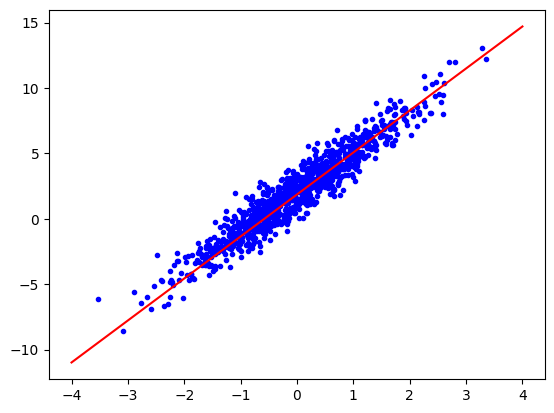

In [ ]:
#--- To keep following outputs, do not run this cell! ---

#### →

On rappelle que la loss-fonction est définie par:

    def loss_fn(y_true,y_pred):
        return torch.mean((y_true - y_pred)**2)

Qu'est-ce que ça change si on remplace `mean` par `sum` ?


